In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
from data_corruption import TransientMaker

In [2]:
## loading ground truth fids
gt_fids = np.load("Tutorials/data/full_ground_truth_fids.npy")
t = np.load("Tutorials/data/t.npy")
t = np.repeat(t,gt_fids.shape[0],axis=0)
ppm = np.load("Tutorials/data/ppm.npy")
ppm = np.repeat(ppm,gt_fids.shape[0],axis=0)

In [3]:
tm = TransientMaker(gt_fids.copy(),t)

tm.add_random_amplitude_noise()
tm.add_random_frequency_noise()
tm.add_random_phase_noise()


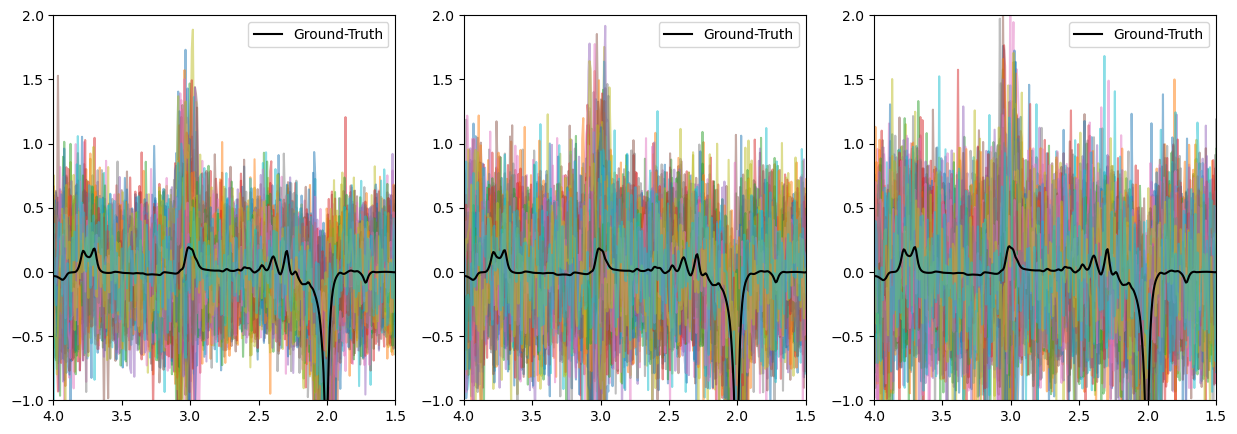

In [18]:
gt_spec = np.fft.fftshift(np.fft.ifft(gt_fids,axis=1),axes=1)
noisy_spec = np.fft.fftshift(np.fft.ifft(tm.fids,axis=1),axes=1)
gt_diff_spec = gt_spec[:,:,1]-gt_spec[:,:,0]
noisy_diff_spec = noisy_spec[:,:,1,:]-noisy_spec[:,:,0,:]

slices = [10,20,30]

fig,ax = plt.subplots(1,len(slices),figsize=(15,5))
for i in range(len(slices)):
    for j in range(noisy_spec[slices[i]].shape[-1]):
        ax[i].plot(ppm[slices[i]],np.real(noisy_diff_spec[slices[i],:,j]),alpha=0.5)
    ax[i].plot(ppm[slices[i]],np.real(gt_diff_spec[slices[i],:]),"k-",label="Ground-Truth")
    ax[i].set_xlim(1.5,4)
    ax[i].set_ylim(-1,2)
    ax[i].invert_xaxis()
    ax[i].legend()

plt.show()
